<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/4%20K-Means_Clustering/K_Means_Clustering_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Introduction

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

T-Shirt example

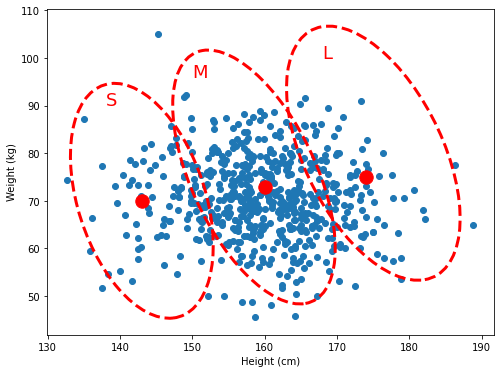

In [2]:
    X, y = make_blobs(n_samples=600, centers=1, center_box=(45,80), cluster_std=8.8, random_state=1)
    X[:,0] += 100
    X = np.float32(X)
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X[:,0],X[:,1],cmap='winter')
    ellipse_s = Ellipse(xy=(143.0, 70.0), width=18, height=50, angle=10, edgecolor='r', fc='None', lw=3, ls='--')
    ellipse_m = Ellipse(xy=(158.5, 75.0), width=18, height=55, angle=15, edgecolor='r', fc='None', lw=3, ls='--')
    ellipse_l = Ellipse(xy=(175.0, 80.0), width=20, height=55, angle=15, edgecolor='r', fc='None', lw=3, ls='--')
    plt.gca().add_patch(ellipse_s)
    plt.gca().add_patch(ellipse_m)
    plt.gca().add_patch(ellipse_l)
    plt.scatter(143, 70, c='r', s=180)
    plt.scatter(160, 73, c='r', s=180)
    plt.scatter(174, 75, c='r', s=180)    
    plt.text(138, 90, "S", fontsize=18, c='r')
    plt.text(150, 96, "M", fontsize=18, c='r')
    plt.text(168, 100, "L", fontsize=18, c='r')
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.savefig("kmeans_introduction_tshirts_sample.svg", format="svg", transparent=True, bbox_inches='tight')
    plt.show()

Generate Sample Data

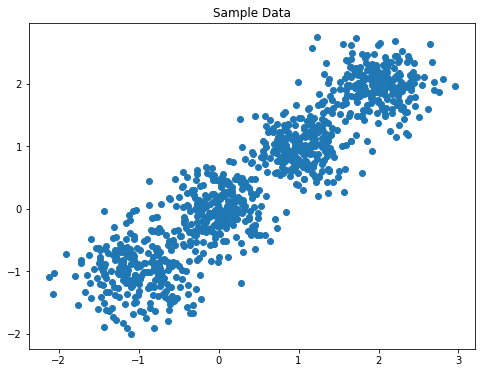

In [3]:
X, _ = make_blobs(n_samples=1000, n_features=2, 
                  centers=[[-1,-1], [0,0], [1,1], [2,2]], 
                  cluster_std=[0.4, 0.3, 0.3, 0.3], 
                  random_state = 9)
fig = plt.figure(figsize=(8, 6))
plt.title("Sample Data")
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.savefig("kmeans_introduction_sample_data.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Run K-Means

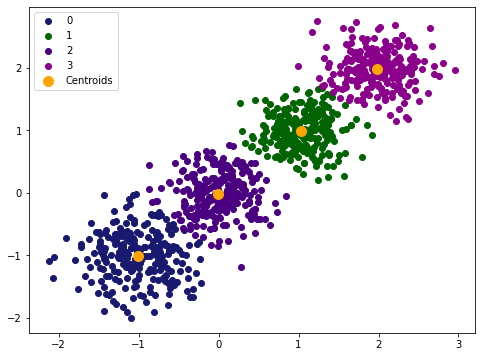

In [28]:
model = KMeans(n_clusters=4, init='k-means++', random_state=9)
y_pred = model.fit_predict(X)
centroids = model.cluster_centers_
labels = model.labels_

colors = {0: 'midnightblue', 1: 'darkgreen', 2: 'indigo', 3: 'darkmagenta'}
fig = plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    ix = np.where(labels == cluster)
    plt.scatter(X[ix,0], X[ix,1], label = cluster, c = colors[cluster])
# plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(centroids[:, 0], centroids[:, 1], c='orange', s=100, label = 'Centroids')
plt.legend(loc='best')
plt.savefig("kmeans_introduction.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Elbow Method 

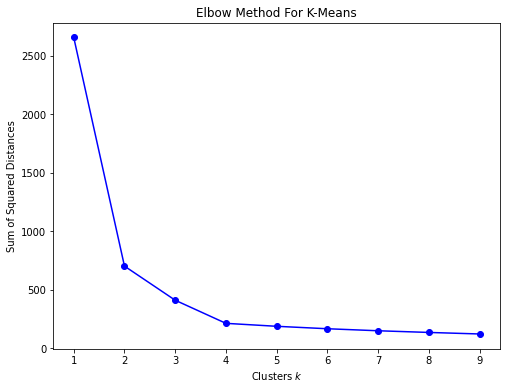

In [31]:
Sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, 
                init='k-means++', 
                random_state=42)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
fig = plt.figure(figsize=(8, 6))
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel(r'Clusters $k$')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For K-Means')
plt.savefig("kmeans_introduction_elbow.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()